### Sensitivity Analysis
Run EVCS agent model repeatedly with varied inputs and plot affect

In [4]:
#Import Packages
import networkx as nx
import mesa 
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

from Model_World2 import *
from EVCS_agent_model2 import *

#### Define function for repeated model runs

In [7]:
def run_model(no_homes, no_chargers, no_work, no_stores, scenario, no_ticks, no_fast,charge_rates, day_ahead_df):
    """ runs the model for defined inputs and returns collected data as a pandas df""" 
        
    if scenario == 1:
        n = abs(no_chargers - no_homes)
    if scenario == 2: 
        n = no_chargers
        
    no_agents = no_homes  #note that number of homes = number of EV agents (one agent per household)
    edge_weight_ranges = {"home_to_work": 3, "work_to_store": 0, "store_to_home": 2} #input factors to generate the edge weights 


    MW = Model_World(no_homes = no_homes, no_work = no_work, no_stores = no_stores, no_ticks = no_ticks)
    Model_Graph = MW.G 
    
    trip_lists = MW.get_trip_lists()
    charger_placement = MW.get_charger_placement(scenario, int(n))
    model = EVCSModel(no_agents=no_agents, no_chargers=no_chargers, charger_placement =charger_placement, no_ticks = no_ticks,
                  G=Model_Graph, trip_lists = trip_lists, no_fast = no_fast, scenario = scenario, charge_rates  = charge_rates, day_ahead_df = day_ahead_df)   
    
    for _ in range(no_ticks):
        model.step()
    
    data_collection = model.datacollector.get_model_vars_dataframe()

    return data_collection

In [8]:
def plot_sensitivity_analysis(item, df): 
    for value in df.columns:
        plt.figure(figsize=(8, 5))
        
        scenario_1 = df[df["Scenario"] == 1]
        scenario_2 = df[df["Scenario"] == 2] 
        
        plt.plot(scenario_1[item],scenario_1[value], label = "Scenario 1")
        plt.plot(scenario_2[item], scenario_2[value],label = "Scenario 2")
        plt.legend()
        plt.xlabel(item)
        plt.ylabel(str(value))
        plt.title("Impact of " + item + " on " + str(value))
        plt.show()
        #plt.savefig(item + "_on_" + str(value) + '.png')

##### Vary number of chargers

In [12]:
number_chargers = np.linspace(130, 300, 11) 

no_homes = 100
no_agents = no_homes
no_work = 20 
no_stores = 30
no_fast = 15
no_ticks = 1334
charge_rates = (26.3, 3.47, 0.7) #(fast charger rate, slow charger rate, home charger rate) 


columns = ['Average Charge Level', 'Average EV Trips Complete', 'Amount Charged', 'Instances of Insufficient Charge', 'Length of Queue']
data = {item:[] for item in columns}  
data["Number of Chargers"] = []
data["Scenario"] = []
data["Electricity Cost"] = []
data["Total Cost"] = []
                      
for no_chargers in number_chargers: 
    for scenario in [1,2]:
        data_collection = run_model(no_homes, int(no_chargers), no_work, no_stores, scenario, no_ticks, no_fast,charge_rates, day_ahead_df)

        data["Scenario"].append(scenario)   
        data["Number of Chargers"].append(no_chargers)
        data['Average Charge Level'].append(data_collection["Average Charge Level"].mean())
        data['Average EV Trips Complete'].append(data_collection['Average EV Trips Complete'].max())
        data["Amount Charged"].append(data_collection["Amount Charged"].max())
        data["Instances of Insufficient Charge"].append(data_collection["Instances of Insufficient Charge"].max())
        data["Length of Queue"].append(data_collection["Length of Queue"].mean())
        data["Electricity Cost"].append(data_collection["Electricity cost (euro)"].sum())
        data["Total Cost"].append(data_collection["Total cost"].sum())
    
    
df = pd.DataFrame(data)

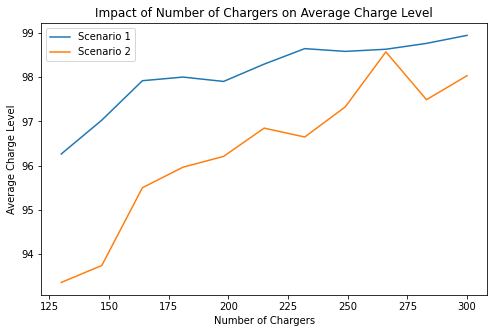

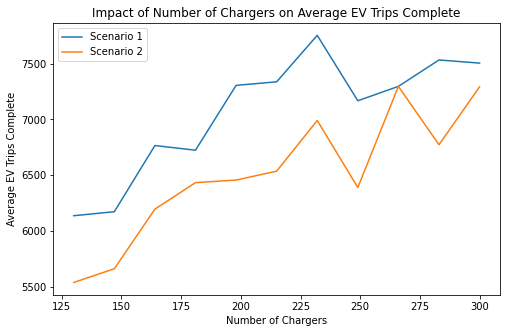

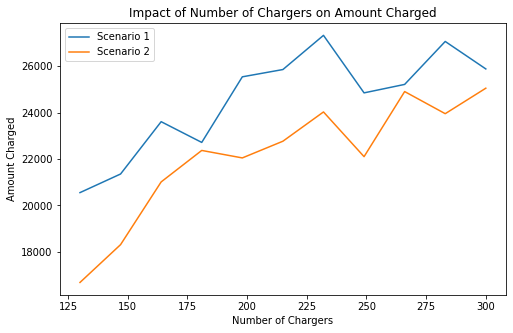

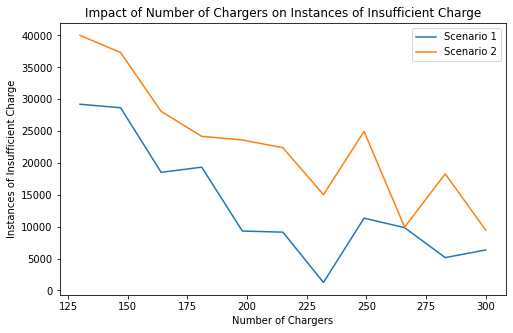

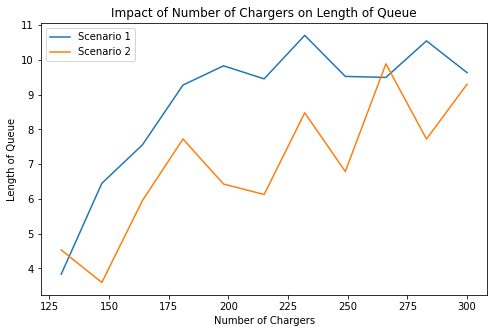

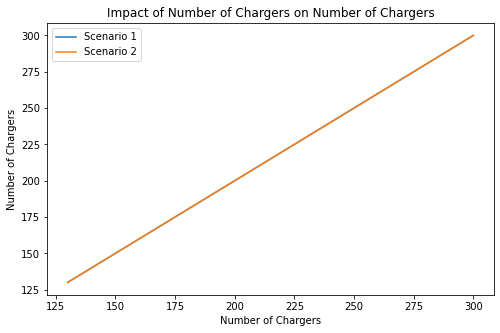

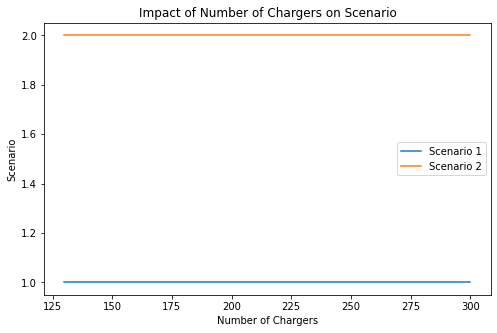

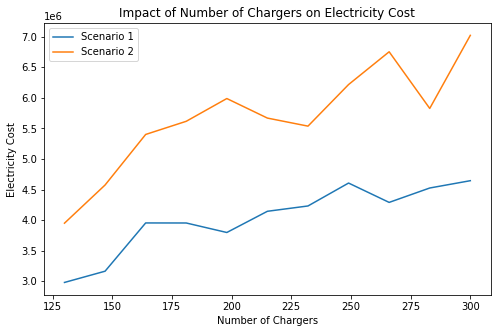

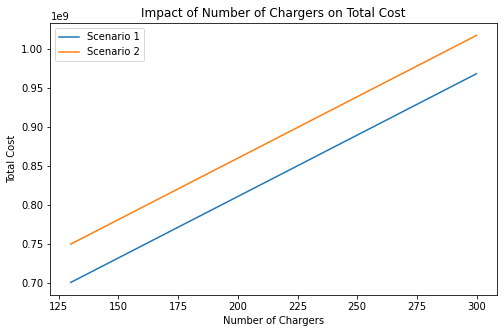

In [13]:
plot_sensitivity_analysis("Number of Chargers", df)

##### Vary number of homes nodes (agents)

In [14]:
number_homes = np.linspace(10,200, 11)

no_agents = int(no_homes)
no_work = 20 
no_stores = 30 
no_fast = 15
no_ticks = 1344
no_ticks = 1334

charge_rates = (26.3, 3.47, 0.7) #(fast charger rate, slow charger rate, home charger rate) 


columns = ['Average Charge Level', 'Average EV Trips Complete', 'Amount Charged', 'Instances of Insufficient Charge', 'Length of Queue']
data = {item:[] for item in columns}  
data["Number of EV agents"] = []
data["Scenario"] = []
data["Electricity Cost"] = []
data["Total Cost"] = []
                      
for no_homes in number_homes: 
    for scenario in [1,2]:
        no_chargers = no_homes + no_fast + 15
        data_collection = run_model(int(no_homes), int(no_chargers), no_work, no_stores, scenario, no_ticks,  no_fast, charge_rates, day_ahead_df)        
        data["Scenario"].append(scenario)   
        data["Number of EV agents"].append(no_homes)
        data['Average Charge Level'].append(data_collection["Average Charge Level"].mean())
        data['Average EV Trips Complete'].append(data_collection['Average EV Trips Complete'].max())
        data["Amount Charged"].append(data_collection["Amount Charged"].max())
        data["Instances of Insufficient Charge"].append(data_collection["Instances of Insufficient Charge"].max())
        data["Length of Queue"].append(data_collection["Length of Queue"].mean())
        data["Electricity Cost"].append(data_collection["Electricity cost (euro)"].sum())
        data["Total Cost"].append(data_collection["Total cost"].sum())
    
    
df = pd.DataFrame(data)

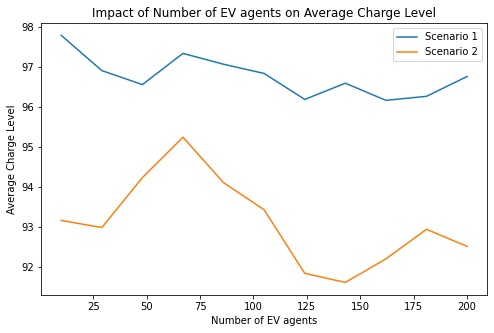

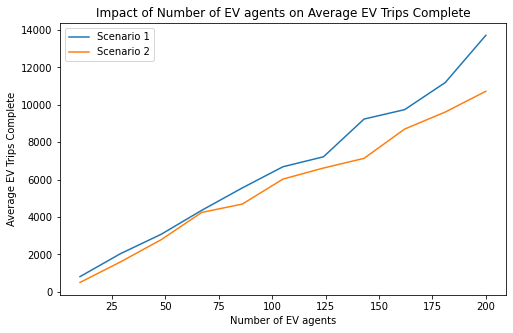

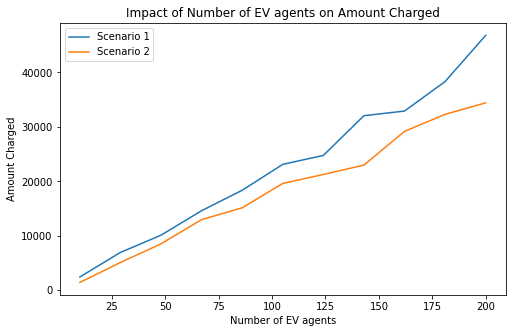

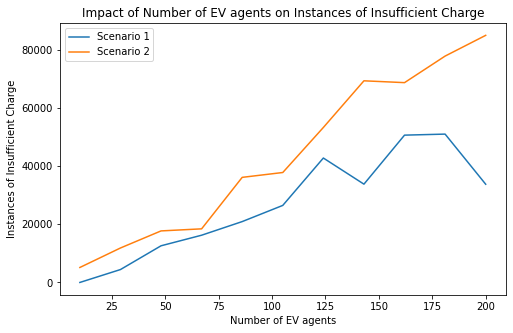

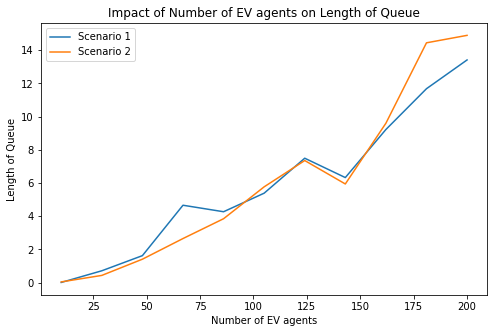

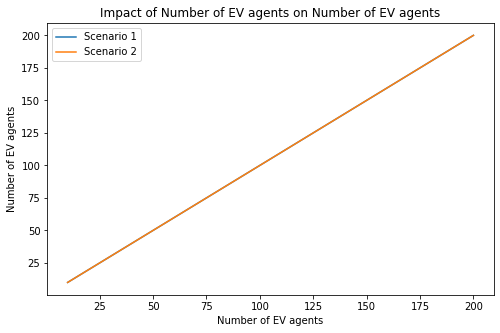

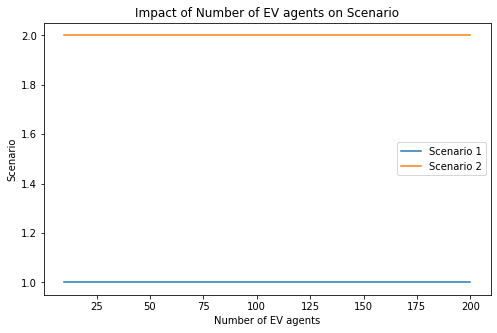

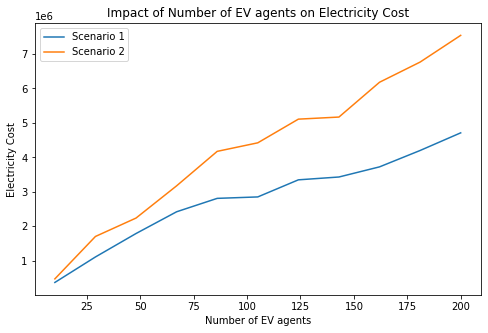

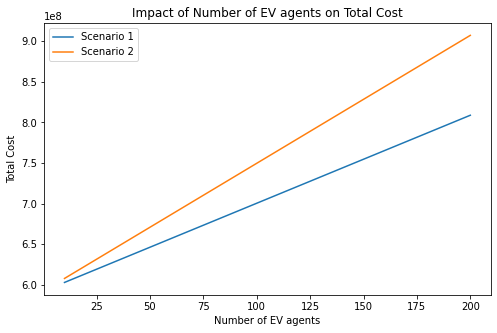

In [15]:
plot_sensitivity_analysis("Number of EV agents", df)

##### Vary number of fast chargers

In [16]:
number_fast = np.linspace(0,25, 11)

no_chargers = 125
no_homes = 100
no_agents = no_homes
no_work = 20 
no_stores = 30
no_ticks = 1334
charge_rates = (26.3, 3.47, 0.7) #(fast charger rate, slow charger rate, home charger rate) 


columns = ['Average Charge Level', 'Average EV Trips Complete', 'Amount Charged', 'Instances of Insufficient Charge', 'Length of Queue']
data = {item:[] for item in columns}  
data["Number of Fast Chargers"] = []
data["Scenario"] = []
data["Electricity Cost"] = []
data["Total Cost"] = []
                      
for no_fast in number_fast: 
    for scenario in [1,2]:
        data_collection = run_model(no_homes, no_chargers, no_work, no_stores, scenario, no_ticks,  int(no_fast), charge_rates, day_ahead_df)
        data["Scenario"].append(scenario)   
        data["Number of Fast Chargers"].append(no_fast)
        data['Average Charge Level'].append(data_collection["Average Charge Level"].mean())
        data['Average EV Trips Complete'].append(data_collection['Average EV Trips Complete'].max())
        data["Amount Charged"].append(data_collection["Amount Charged"].max())
        data["Instances of Insufficient Charge"].append(data_collection["Instances of Insufficient Charge"].max())
        data["Length of Queue"].append(data_collection["Length of Queue"].mean())
        data["Electricity Cost"].append(data_collection["Electricity cost (euro)"].sum())
        data["Total Cost"].append(data_collection["Total cost"].sum())
    
    
df = pd.DataFrame(data)

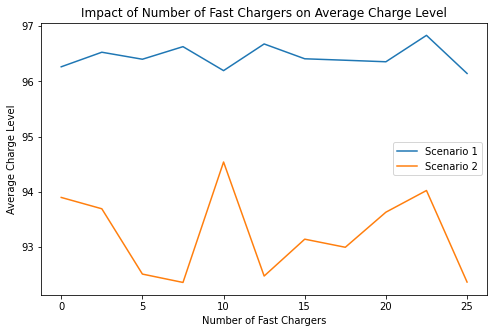

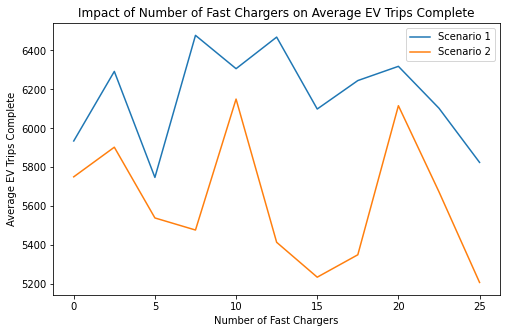

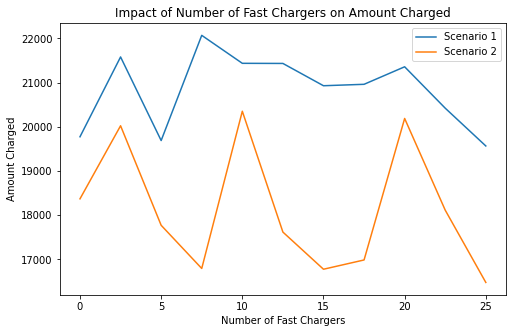

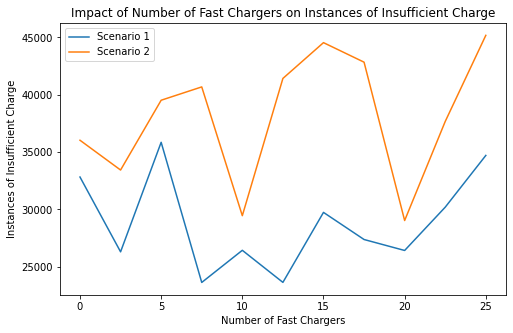

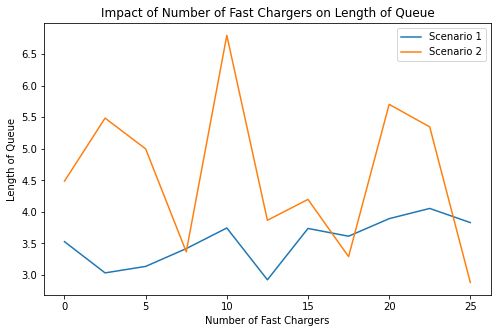

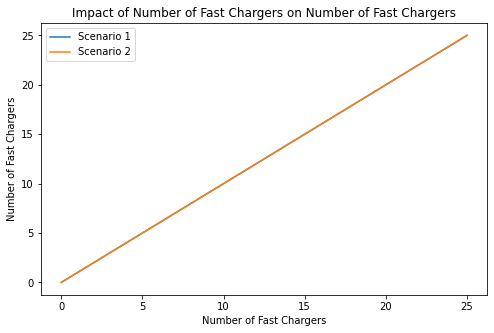

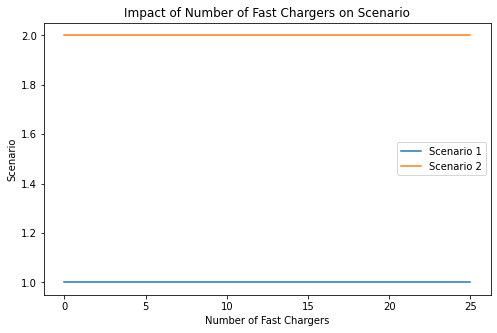

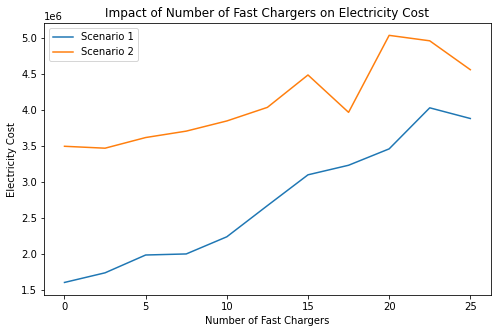

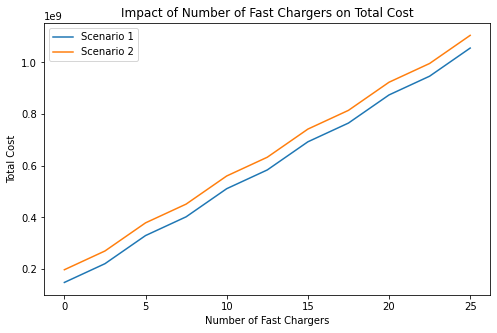

In [17]:
plot_sensitivity_analysis("Number of Fast Chargers", df)